In [ ]:
!pip install mlflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.1/575.1 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.9 MB/s eta 0:00:00


In [1]:
import pandas as pd

# Load the dataset
data_path = "/content/books_task.csv"  # Replace with your CSV file path
books_df = pd.read_csv(data_path)




In [2]:
# Display basic info about the dataset
books_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138724 entries, 0 to 138723
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     138724 non-null  int64  
 1   Title          138724 non-null  object 
 2   description    125975 non-null  object 
 3   authors        136001 non-null  object 
 4   publisher      138724 non-null  object 
 5   publishedDate  138376 non-null  object 
 6   categories     138724 non-null  object 
 7   Impact         138724 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 8.5+ MB


In [3]:
books_df.head()

,Unnamed: 0,Title,description,authors,publisher,publishedDate,categories,Impact
0,0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],Smithsonian Institution,1996,['Comics & Graphic Novels'],784.303924
1,1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],825.465535
2,2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],OUP USA,2000,['Religion'],841.705321
3,3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],iUniverse,2005-02,['Fiction'],666.426542
4,5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],Wm. B. Eerdmans Publishing,1996,['Religion'],806.216143


In [4]:
books_df.drop(columns=["Unnamed: 0"],axis=1,inplace=True)

In [5]:
# Check for missing values
print(books_df.isnull().sum())




Title                0
description      12749
authors           2723
publisher            0
publishedDate      348
categories           0
Impact               0
dtype: int64


In [6]:
# Basic statistics
print(books_df.describe())


              Impact
count  138724.000000
mean      786.763662
std        63.640350
min         0.000000
25%       763.039309
50%       805.568540
75%       819.108336
max      1000.000000


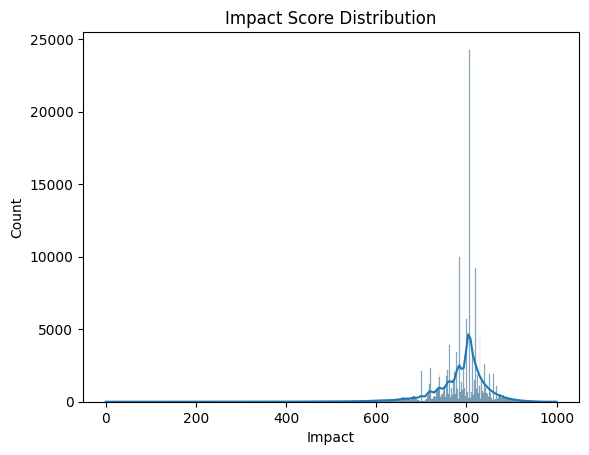

In [7]:
# Visualize the distribution of impact scores
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(books_df['Impact'], kde=True)
plt.title('Impact Score Distribution')
plt.show()

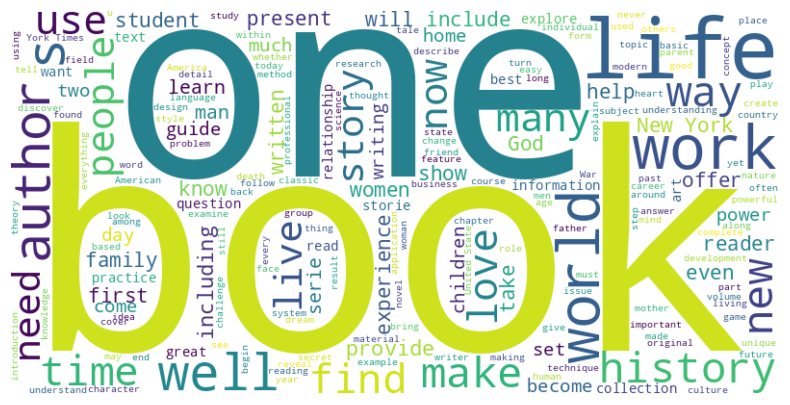

In [8]:
from wordcloud import WordCloud

text = " ".join(books_df['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### Understanding the Number of unique Categories in Each categorical columns

In [9]:
## Cleaning the cateogorical columns
books_df["authors"] = books_df["authors"].str.replace("[", "").str.replace("]", "").str.replace("'", "")
books_df["categories"] = books_df["categories"].str.replace("[", "").str.replace("]", "").str.replace("'", "")

In [12]:
books_df["categories"].nunique()

100

In [13]:
books_df["authors"].nunique()

97799

In [15]:
books_df["publisher"].nunique()

12855

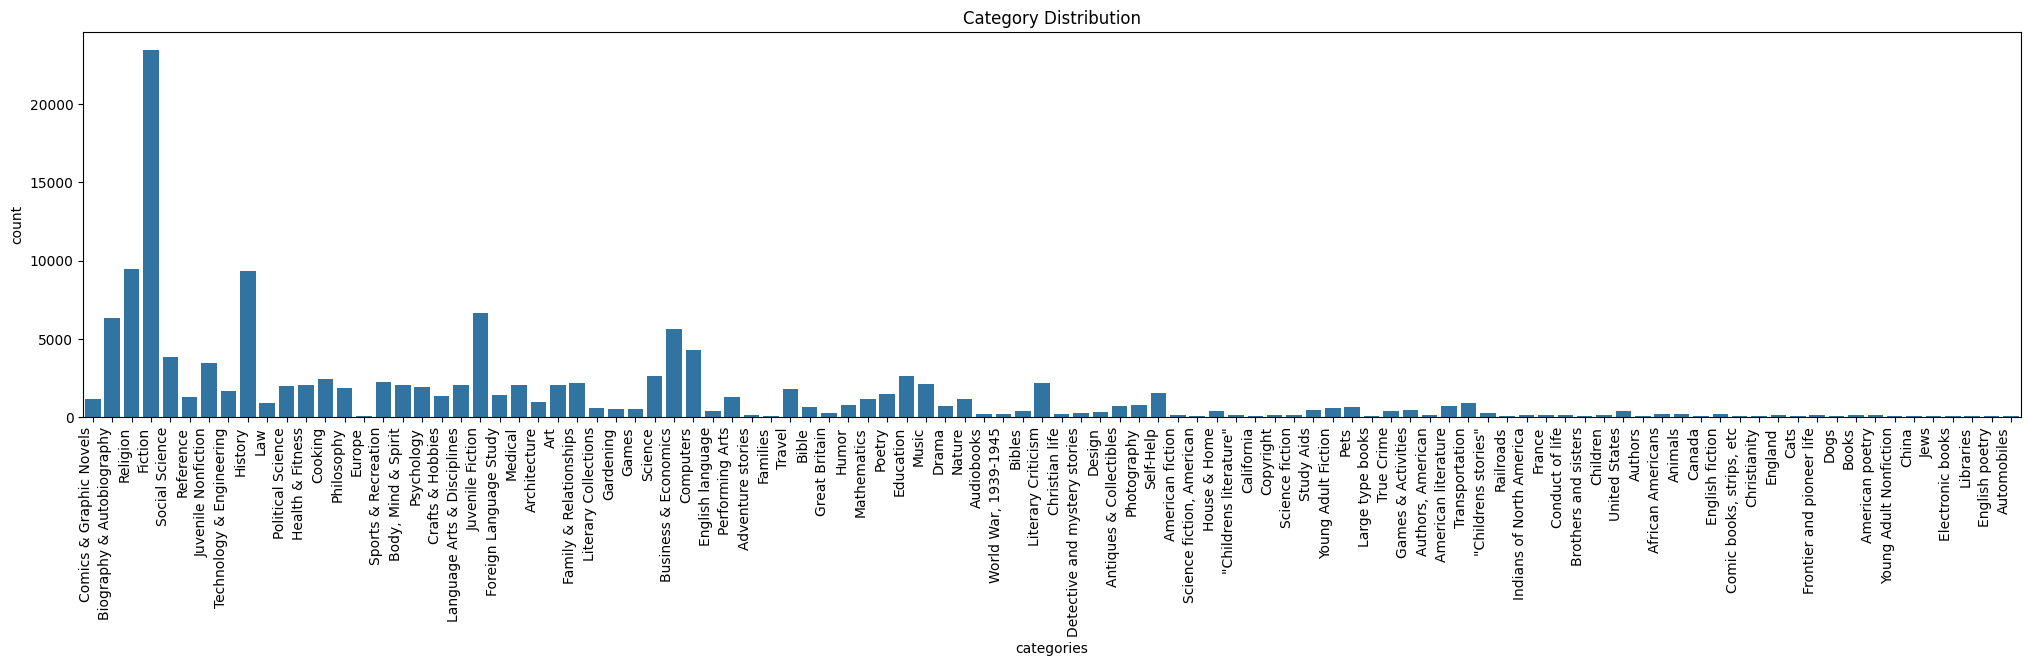

In [19]:
## Category Distribution
plt.figure(figsize=(25, 5))
sns.countplot(x="categories", data=books_df)
plt.xticks(rotation=90, ha="right")
plt.title("Category Distribution")
plt.show()

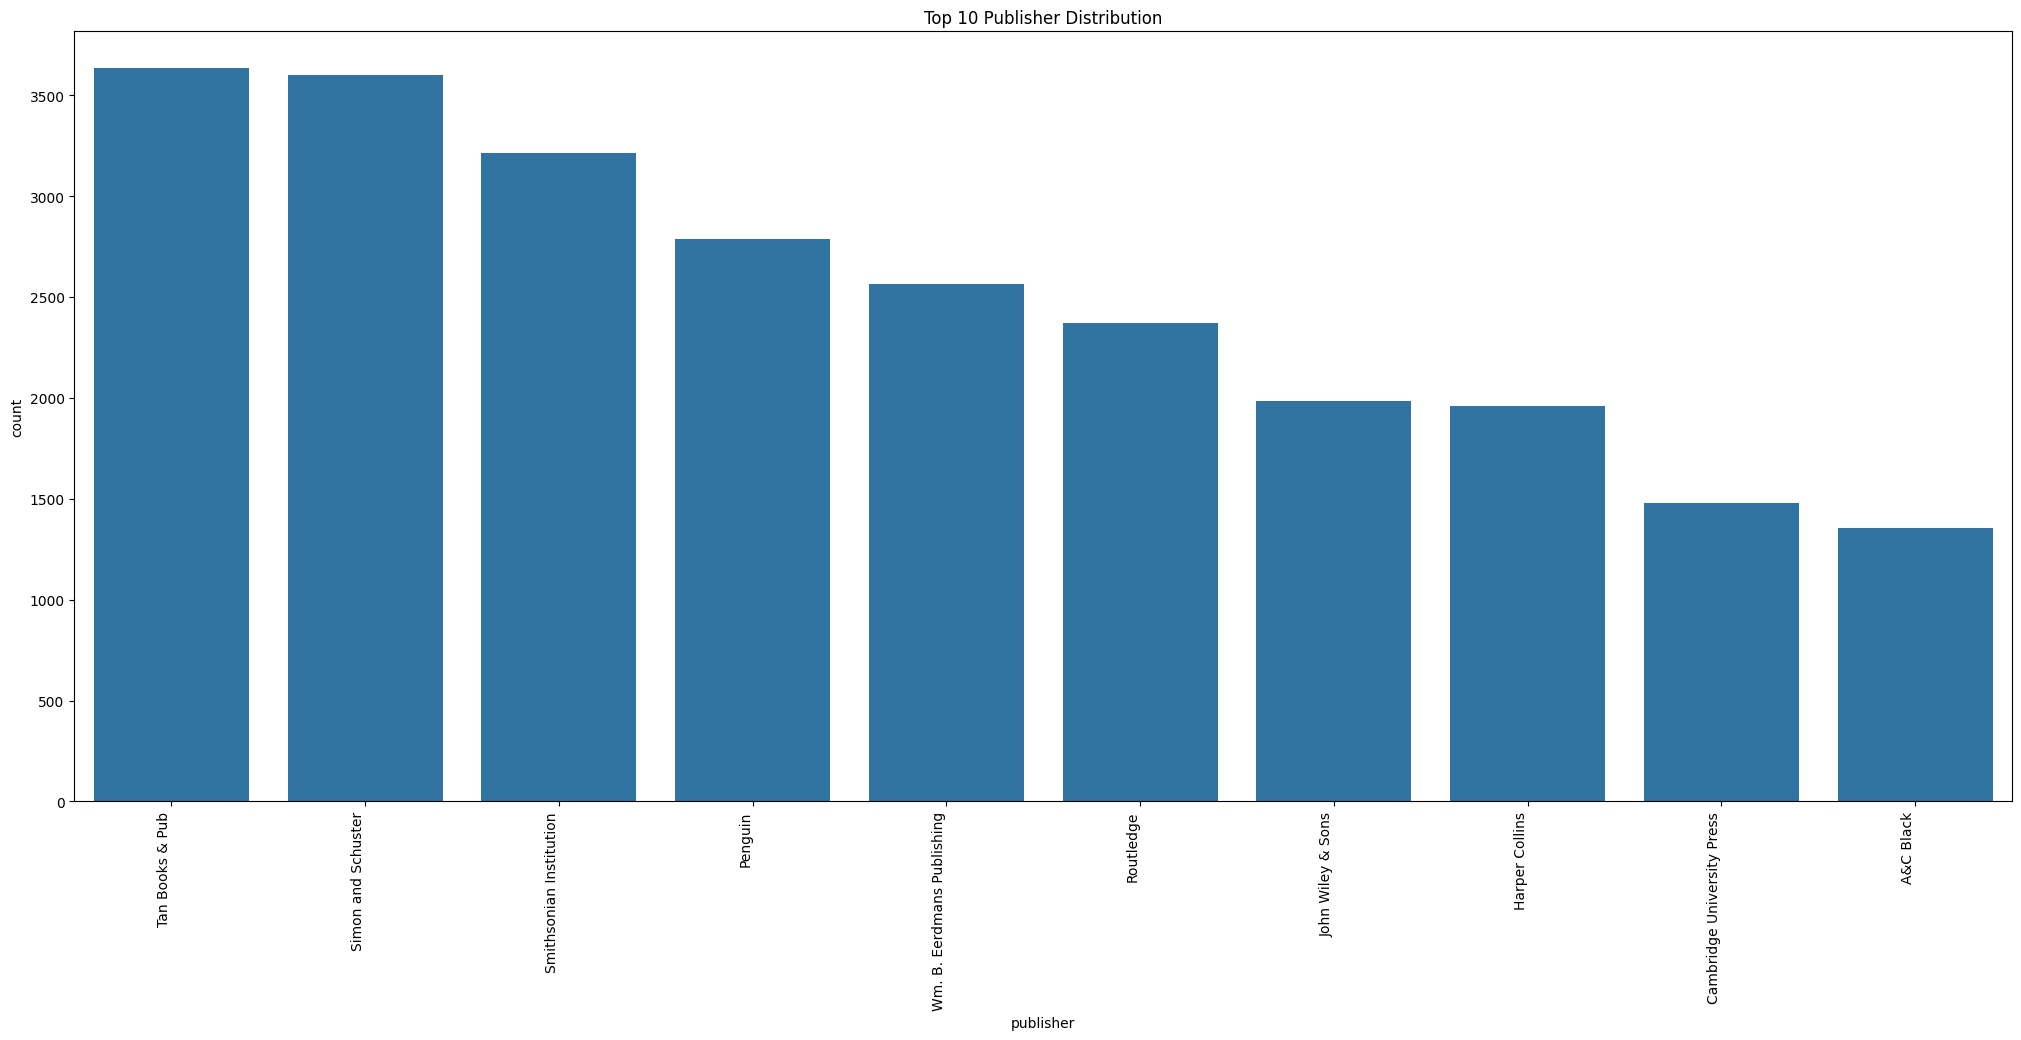

In [22]:
# --- Top 10 Publisher ---
# Get the top 10 publishers by count
top_10_publishers = books_df['publisher'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 publishers
filtered_df = books_df[books_df['publisher'].isin(top_10_publishers)]

# Create the countplot
plt.figure(figsize=(25, 10))
sns.countplot(x="publisher", data=filtered_df, order=top_10_publishers)
plt.xticks(rotation=90, ha="right")
plt.title("Top 10 Publisher Distribution")
plt.show()

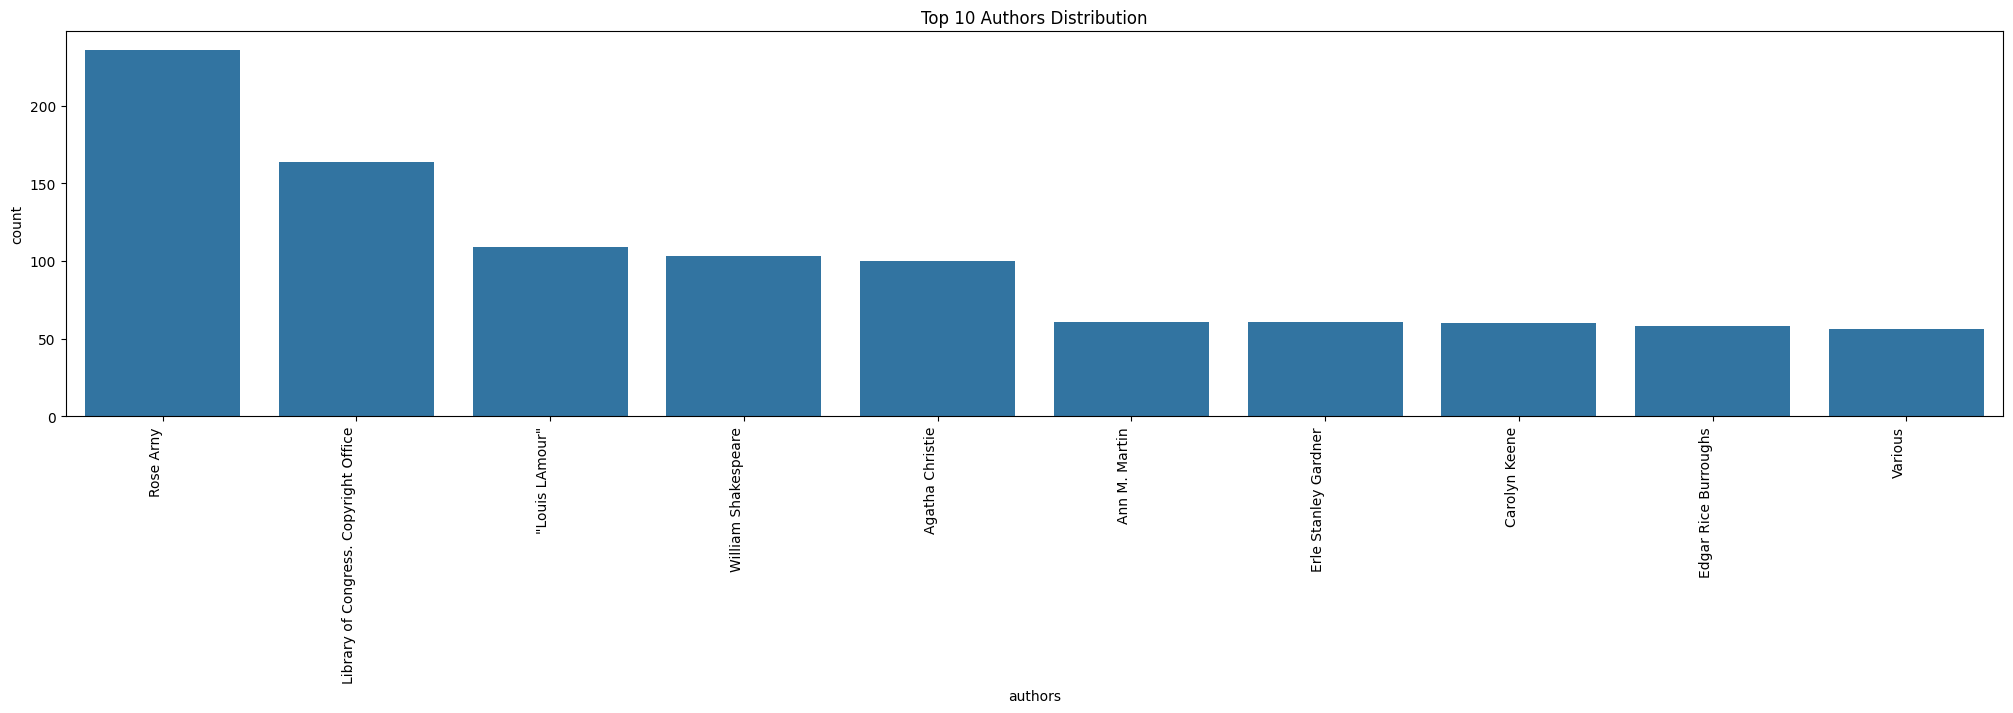

In [24]:
# --- Top 10 Authors ---
top_10_authors = books_df['authors'].value_counts().nlargest(10).index
filtered_authors_df = books_df[books_df['authors'].isin(top_10_authors)]

plt.figure(figsize=(25, 5))
sns.countplot(x="authors", data=filtered_authors_df, order=top_10_authors)
plt.xticks(rotation=90, ha="right")
plt.title("Top 10 Authors Distribution")
plt.show()

### Intiating Spark Session

In [43]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, Tokenizer, StopWordsRemover, HashingTF, IDF,PCA,FeatureHasher
from pyspark.ml.regression import RandomForestRegressor, LinearRegression
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml import Pipeline
from pyspark.sql.functions import col, concat_ws, lower, regexp_replace, abs, mean
from pyspark.sql.functions import abs, col
import mlflow
import mlflow.spark
import matplotlib.pyplot as plt
import pandas as pd



spark = SparkSession.builder \
    .appName("MLFlow_Autologging_PySpark") \
    .config("spark.executor.memory", "16g") \
    .config("spark.driver.memory", "16g") \
    .config("spark.executor.cores", "8") \
    .config("spark.num.executors", "8") \
    .getOrCreate()


#### Intiating MLFLow and Loading Data

In [44]:

# Enable MLflow tracking
mlflow.set_tracking_uri("mlruns")
mlflow.set_experiment("Book Impact Prediction")

# Load dataset
data_path = "/content/books_task.csv"
books_df = spark.read.csv(
    data_path,
    header=True,
    inferSchema=True,
    quote='"',
    escape='"',
    multiLine=True
)

# Drop unnecessary columns (if needed)
books_df = books_df.drop("_c0")

### Feature Engineering and Data Preprocessing

In [45]:
# Preprocessing: Handling missing values and feature engineering
books_df = books_df.fillna({
    "description": "Unknown",
    "Title": "Unknown",
    "categories": "Unknown",
    "publisher": "Unknown"
})
# Handle missing values and merge Description and Title columns
books_df = books_df.fillna({"description": "Unknown", "Title": "Unknown", "categories": "Unknown", "publisher": "Unknown"})
books_df = books_df.withColumn("merged_text", concat_ws(" ", col("Title"), col("description")))

# Preprocess text: Lowercase and remove special characters
books_df = books_df.withColumn("merged_text", lower(col("merged_text")))
books_df = books_df.withColumn("merged_text", regexp_replace(col("merged_text"), "[^a-zA-Z\\s]", ""))

### Converting Textual Features into Vectors using TF-IDF. Optionally, Text embeddings could also be used.

In [47]:
# Tokenize the text
tokenizer = Tokenizer(inputCol="merged_text", outputCol="tokens")
books_df = tokenizer.transform(books_df)

# Remove stop words
stopwords_remover = StopWordsRemover(inputCol="tokens", outputCol="filtered_tokens")
books_df = stopwords_remover.transform(books_df)

hashingTF = HashingTF(inputCol="filtered_tokens", outputCol="rawFeatures", numFeatures=500)
featurizedData = hashingTF.transform(books_df)

idf = IDF(inputCol="rawFeatures", outputCol="tfidf_features")
idfModel = idf.fit(featurizedData)
rescaledData = idfModel.transform(featurizedData)



### Converting Categorical Columns into Numerical Features using Hashing Encoder

In [48]:

feature_hasher = FeatureHasher(inputCols=["categories", "authors", "publisher"], outputCol="hashed_features", numFeatures=500)

books_df = feature_hasher.transform(rescaledData)

In [49]:

assembler = VectorAssembler(inputCols=["tfidf_features", "hashed_features"], outputCol="features")
books_df = assembler.transform(books_df)

# pca = PCA(k=100, inputCol="combined_features", outputCol="features")  # Adjust k as needed
# pcaModel = pca.fit(books_df)
# books_df = pcaModel.transform(books_df)



# Function to calculate MAPE
def calculate_mape(predictions):
    # Add a new column for the absolute percentage error
    mape_df = predictions.withColumn("abs_error", abs((col("Impact") - col("prediction")) / col("Impact")))

    # Calculate the average MAPE
    mape = mape_df.agg({"abs_error": "avg"}).collect()[0][0] * 100  # Multiply by 100 to get percentage
    return mape

def plot_actual_vs_predicted(predictions):
    # Convert the Spark DataFrame to Pandas for plotting
    predictions_pd = predictions.select("Impact", "prediction").toPandas()

    # Plot the graph
    plt.figure(figsize=(10, 6))

    # Scatter plot for actual values in red
    plt.scatter(predictions_pd["Impact"], predictions_pd["Impact"], color='red', alpha=0.5, label="Actual Values")

    # Scatter plot for predicted values in blue
    plt.scatter(predictions_pd["Impact"], predictions_pd["prediction"], color='blue', alpha=0.5, label="Predicted Values")

    # Labeling the axes
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted Values")
    plt.legend()
    plt.show()


#### Creating Training and Test Data

In [50]:
train_df, test_df = books_df.randomSplit([0.8, 0.2], seed=42)

### Following Steps are Included in the below Code:

*   Training Of Model With CrossValidation
*   Versioning of Model and Parameters using MLFlow
*   Evaluating the Model With MAPE




root
 |-- Title: string (nullable = false)
 |-- description: string (nullable = false)
 |-- authors: string (nullable = true)
 |-- publisher: string (nullable = false)
 |-- publishedDate: string (nullable = true)
 |-- categories: string (nullable = false)
 |-- Impact: double (nullable = true)
 |-- merged_text: string (nullable = false)
 |-- tokens: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- filtered_tokens: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- rawFeatures: vector (nullable = true)
 |-- tfidf_features: vector (nullable = true)
 |-- hashed_features: vector (nullable = true)
 |-- features: vector (nullable = true)
 |-- prediction: double (nullable = false)

+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------

2024/12/10 16:00:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


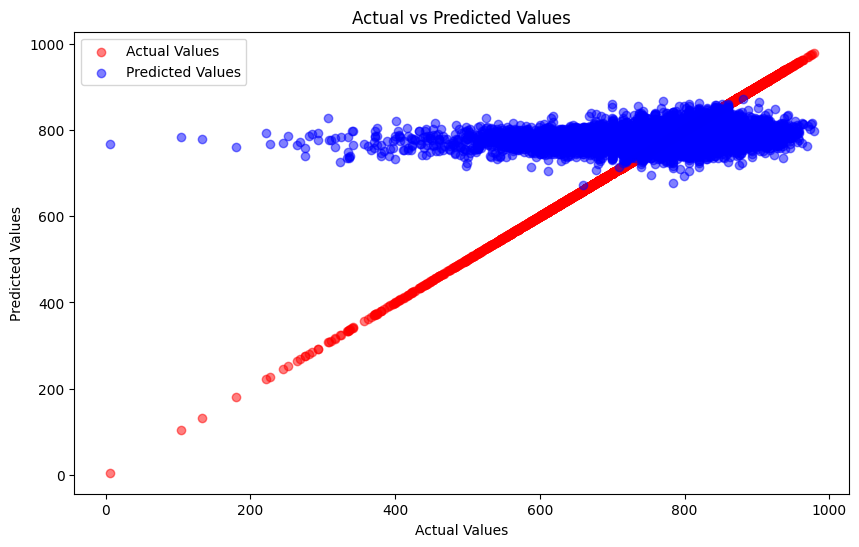

Experiment Results:
linear_regression: MAPE = 6.252793056534614


In [51]:
# Function to run MLflow experiment
def run_mlflow_experiment(model, train_data, test_data, model_name):
    with mlflow.start_run():

        pipeline = Pipeline(stages=[model])

        param_grid = ParamGridBuilder().build()
                # .addGrid(model.regParam, [0.1]) \
                # .addGrid(model.elasticNetParam, [0.0]) \


        # Cross-validator with RMSE as the metric
        evaluator = RegressionEvaluator(labelCol="Impact", predictionCol="prediction", metricName="rmse")
        cv = CrossValidator(
            estimator=pipeline,
            estimatorParamMaps=param_grid,
            evaluator=evaluator,
            numFolds=2
        )

        # Fit the cross-validator on training data
        cv_model = cv.fit(train_data)

        # Get the best model
        best_model = cv_model.bestModel

        # Predict on the test set
        predictions = best_model.transform(test_data)
            # Debug: Inspect predictions
        predictions.printSchema()
        predictions.show(5)

        # Calculate custom MAPE
        mape = calculate_mape(predictions)
        rmse=evaluator.evaluate(predictions)

        # Log metrics and parameters in MLflow
        mlflow.log_metric("rmse", evaluator.evaluate(predictions))
        mlflow.log_metric("mape", mape)

        # Log the model
        mlflow.spark.log_model(best_model, model_name)
        plot_actual_vs_predicted(predictions)

        return mape

# Run experiments with different models
models = [
    # (RandomForestRegressor(featuresCol="features", labelCol="Impact"), "random_forest"),
    (LinearRegression(featuresCol="features", labelCol="Impact"), "linear_regression")
    # (GBTRegressor(featuresCol="features", labelCol="Impact", maxIter=50),"GBTRegressor")

]

# Run experiments and store results
results = {}
for model, model_name in models:
    results[model_name] = run_mlflow_experiment(model, train_df, test_df, model_name)

# Print results
print("Experiment Results:")
for model_name, mape in results.items():
    print(f"{model_name}: MAPE = {mape}")

# Stop Spark session
spark.stop()

### Testing the APP on Different Spark Worker Configurations and Storing the Time taken

Evaluating training time for different worker configurations...
Running linear_regression with 1 workers...


2024/12/10 15:38:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


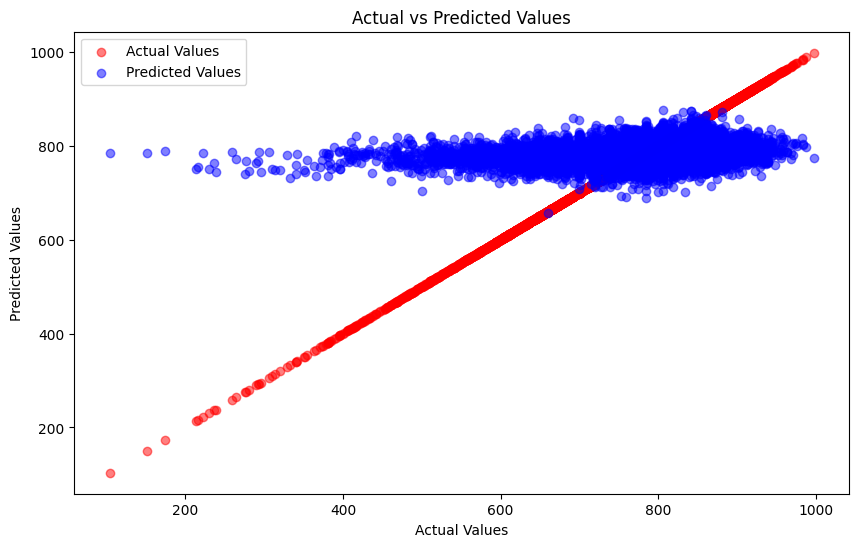

Training with 1 worker(s) completed in 393.47 seconds.
Running linear_regression with 2 workers...


2024/12/10 15:45:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


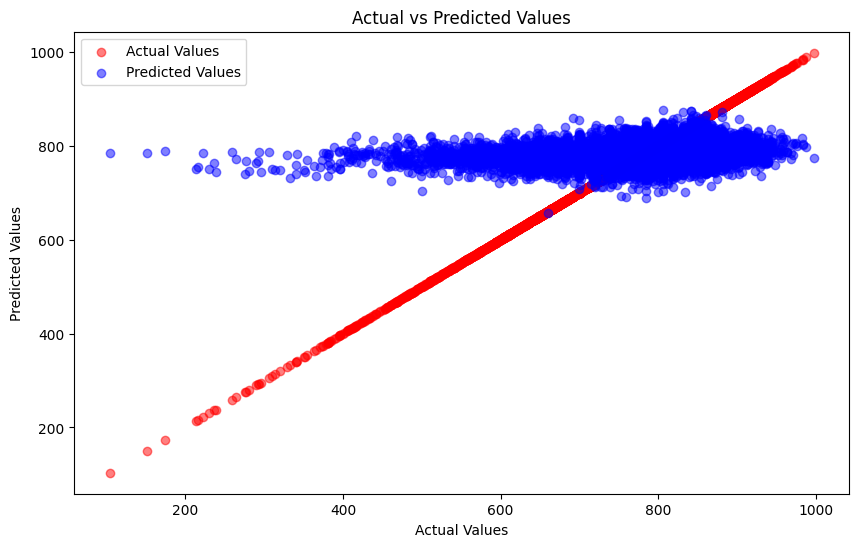

Training with 2 worker(s) completed in 394.10 seconds.
Running linear_regression with 4 workers...


2024/12/10 15:51:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


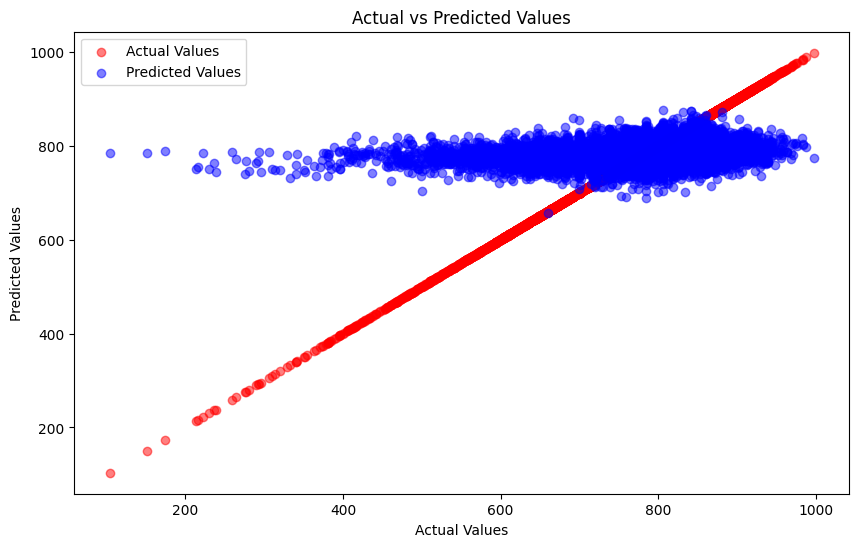

Training with 4 worker(s) completed in 392.08 seconds.
Training Time Results:
1 Worker(s): 393.47 seconds
2 Worker(s): 394.10 seconds
4 Worker(s): 392.08 seconds


In [42]:
import time
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, Tokenizer, StopWordsRemover, HashingTF, IDF, FeatureHasher
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml import Pipeline
from pyspark.sql.functions import col, concat_ws, lower, regexp_replace, abs
import mlflow
import mlflow.spark
import matplotlib.pyplot as plt


# Function to calculate MAPE
def calculate_mape(predictions):
    mape_df = predictions.withColumn("abs_error", abs((col("Impact") - col("prediction")) / col("Impact")))
    mape = mape_df.agg({"abs_error": "avg"}).collect()[0][0] * 100  # Multiply by 100 for percentage
    return mape

def plot_actual_vs_predicted(predictions):
    predictions_pd = predictions.select("Impact", "prediction").toPandas()
    plt.figure(figsize=(10, 6))
    plt.scatter(predictions_pd["Impact"], predictions_pd["Impact"], color='red', alpha=0.5, label="Actual Values")
    plt.scatter(predictions_pd["Impact"], predictions_pd["prediction"], color='blue', alpha=0.5, label="Predicted Values")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted Values")
    plt.legend()
    plt.show()

# Function to run MLflow experiment
def run_mlflow_experiment(model, train_data, test_data, model_name):
    with mlflow.start_run():

        pipeline = Pipeline(stages=[model])

        param_grid = ParamGridBuilder().build()

        evaluator = RegressionEvaluator(labelCol="Impact", predictionCol="prediction", metricName="rmse")
        cv = CrossValidator(
            estimator=pipeline,
            estimatorParamMaps=param_grid,
            evaluator=evaluator,
            numFolds=2
        )

        # Fit the cross-validator on training data
        cv_model = cv.fit(train_data)

        # Get the best model
        best_model = cv_model.bestModel

        # Predict on the test set
        predictions = best_model.transform(test_data)

        # Calculate custom MAPE
        mape = calculate_mape(predictions)
        rmse = evaluator.evaluate(predictions)

        # Log metrics and parameters in MLflow
        mlflow.log_metric("rmse", evaluator.evaluate(predictions))
        mlflow.log_metric("mape", mape)

        # Log the model
        mlflow.spark.log_model(best_model, model_name)
        plot_actual_vs_predicted(predictions)

        return mape

# Function to evaluate total training time for different worker configurations
def evaluate_training_time(train_data, test_data, models):
    worker_configs = [1, 2, 4]  # Simulated worker configurations
    training_times = {}

    print("Evaluating training time for different worker configurations...")
    for workers in worker_configs:
        # Start a new Spark session with the desired number of workers
        spark = SparkSession.builder \
            .appName(f"MLFlow_Autologging_PySpark_{workers}_workers") \
            .config("spark.executor.memory", "16g") \
            .config("spark.driver.memory", "16g") \
            .config("spark.executor.cores", "8") \
            .config("spark.num.executors", str(workers)) \
            .getOrCreate()

        # Measure training time
        start_time = time.time()

        # Run MLflow experiments with each model
        for model, model_name in models:
            print(f"Running {model_name} with {workers} workers...")
            run_mlflow_experiment(model, train_data, test_data, model_name)

        end_time = time.time()

        elapsed_time = end_time - start_time
        training_times[workers] = elapsed_time
        print(f"Training with {workers} worker(s) completed in {elapsed_time:.2f} seconds.")

    #   # Stop the Spark session after the experiment
    # spark.stop()

    # Print total training times for each configuration
    print("Training Time Results:")
    for workers, time_taken in training_times.items():
        print(f"{workers} Worker(s): {time_taken:.2f} seconds")

# Initialize Spark session (initial session for data preparation)
spark = SparkSession.builder \
    .appName("MLFlow_Autologging_PySpark") \
    .config("spark.executor.memory", "16g") \
    .config("spark.driver.memory", "16g") \
    .config("spark.executor.cores", "8") \
    .config("spark.num.executors", "8") \
    .getOrCreate()

# Enable MLflow tracking
mlflow.set_tracking_uri("mlruns")
mlflow.set_experiment("Book Impact Prediction")

# Load dataset
data_path = "/content/books_task.csv"
books_df = spark.read.csv(
    data_path,
    header=True,
    inferSchema=True,
    quote='"',
    escape='"',
    multiLine=True
)

# Preprocessing
books_df = books_df.fillna({
    "description": "Unknown",
    "Title": "Unknown",
    "categories": "Unknown",
    "publisher": "Unknown"
})
books_df = books_df.withColumn("merged_text", concat_ws(" ", col("Title"), col("description")))
books_df = books_df.withColumn("merged_text", lower(col("merged_text")))
books_df = books_df.withColumn("merged_text", regexp_replace(col("merged_text"), "[^a-zA-Z\\s]", ""))
tokenizer = Tokenizer(inputCol="merged_text", outputCol="tokens")
books_df = tokenizer.transform(books_df)
stopwords_remover = StopWordsRemover(inputCol="tokens", outputCol="filtered_tokens")
books_df = stopwords_remover.transform(books_df)
hashingTF = HashingTF(inputCol="filtered_tokens", outputCol="rawFeatures", numFeatures=500)
featurizedData = hashingTF.transform(books_df)
idf = IDF(inputCol="rawFeatures", outputCol="tfidf_features")
idfModel = idf.fit(featurizedData)
rescaledData = idfModel.transform(featurizedData)
feature_hasher = FeatureHasher(inputCols=["categories", "authors", "publisher"], outputCol="hashed_features", numFeatures=500)
books_df = feature_hasher.transform(rescaledData)
assembler = VectorAssembler(inputCols=["tfidf_features", "hashed_features"], outputCol="features")
books_df = assembler.transform(books_df)

# Split the data into train and test sets
train_df, test_df = books_df.randomSplit([0.8, 0.2], seed=42)

# Run the experiment with different models
models = [
    (LinearRegression(featuresCol="features", labelCol="Impact"), "linear_regression")
]

# Evaluate training time for different worker configurations
evaluate_training_time(train_df, test_df, models)
